<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span><ul class="toc-item"><li><span><a href="#Preprocess-10X" data-toc-modified-id="Preprocess-10X-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preprocess 10X</a></span></li><li><span><a href="#Load-10X" data-toc-modified-id="Load-10X-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Load 10X</a></span></li><li><span><a href="#Reduce-dimensions" data-toc-modified-id="Reduce-dimensions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Reduce dimensions</a></span></li><li><span><a href="#Merge-samples" data-toc-modified-id="Merge-samples-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Merge samples</a></span></li><li><span><a href="#Load-gene-markers" data-toc-modified-id="Load-gene-markers-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Load gene markers</a></span></li><li><span><a href="#Get-gene-markers-from-cell-type" data-toc-modified-id="Get-gene-markers-from-cell-type-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Get gene markers from cell type</a></span></li><li><span><a href="#Plot-gene-markers" data-toc-modified-id="Plot-gene-markers-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Plot gene markers</a></span></li></ul></li><li><span><a href="#Main" data-toc-modified-id="Main-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Main</a></span><ul class="toc-item"><li><span><a href="#Load-data-and-preprocess" data-toc-modified-id="Load-data-and-preprocess-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load data and preprocess</a></span></li><li><span><a href="#Create-metadata" data-toc-modified-id="Create-metadata-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Create metadata</a></span></li><li><span><a href="#Load-gene-markers-to-dataframe" data-toc-modified-id="Load-gene-markers-to-dataframe-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Load gene markers to dataframe</a></span></li><li><span><a href="#Reduce-dimensions" data-toc-modified-id="Reduce-dimensions-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Reduce dimensions</a></span></li><li><span><a href="#Clustering" data-toc-modified-id="Clustering-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Clustering</a></span><ul class="toc-item"><li><span><a href="#Obtain-PCA-and-singular-values" data-toc-modified-id="Obtain-PCA-and-singular-values-3.5.1"><span class="toc-item-num">3.5.1&nbsp;&nbsp;</span>Obtain PCA and singular values</a></span></li><li><span><a href="#Obtain-phate-data" data-toc-modified-id="Obtain-phate-data-3.5.2"><span class="toc-item-num">3.5.2&nbsp;&nbsp;</span>Obtain phate data</a></span></li><li><span><a href="#Obtain-UMAP-data" data-toc-modified-id="Obtain-UMAP-data-3.5.3"><span class="toc-item-num">3.5.3&nbsp;&nbsp;</span>Obtain UMAP data</a></span></li><li><span><a href="#Display-UMAP-for-all-samples" data-toc-modified-id="Display-UMAP-for-all-samples-3.5.4"><span class="toc-item-num">3.5.4&nbsp;&nbsp;</span>Display UMAP for all samples</a></span></li><li><span><a href="#Display-PHATE-for-all-samples" data-toc-modified-id="Display-PHATE-for-all-samples-3.5.5"><span class="toc-item-num">3.5.5&nbsp;&nbsp;</span>Display PHATE for all samples</a></span></li><li><span><a href="#Obtain-clusters-from-UMAP-data" data-toc-modified-id="Obtain-clusters-from-UMAP-data-3.5.6"><span class="toc-item-num">3.5.6&nbsp;&nbsp;</span>Obtain clusters from UMAP data</a></span></li><li><span><a href="#Plot-all-clusters" data-toc-modified-id="Plot-all-clusters-3.5.7"><span class="toc-item-num">3.5.7&nbsp;&nbsp;</span>Plot all clusters</a></span></li><li><span><a href="#Obtain-gene-markers" data-toc-modified-id="Obtain-gene-markers-3.5.8"><span class="toc-item-num">3.5.8&nbsp;&nbsp;</span>Obtain gene markers</a></span></li><li><span><a href="#Plot-genes-on-UMAP" data-toc-modified-id="Plot-genes-on-UMAP-3.5.9"><span class="toc-item-num">3.5.9&nbsp;&nbsp;</span>Plot genes on UMAP</a></span></li></ul></li><li><span><a href="#Differential-expression" data-toc-modified-id="Differential-expression-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Differential expression</a></span></li></ul></li></ul></div>

# Imports

In [1]:
# !pip install phate scprep umap-learn tasklogger magic-impute louvain seaborn
# !pip install git+https://github.com/jacoblevine/phenograph.git
# !pip install jupyter_contrib_nbextensions


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
import sklearn.cluster
import sklearn.manifold

import scprep
import os
import tasklogger
import phate
import umap

import graphtools as gt
import magic
import phenograph
import louvain

from sklearn.decomposition import PCA


c:\users\stéphane\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.


# Functions

## Preprocess 10X

In [3]:
#' This function takes a data-frame (genes x cells), 
#' creates a Scprep object with it and filters the object for default tags such as  
#' Min and max nFeature_RNA and % of MT
#' 
#'
#' @param data data-frame
#' @param percent_mt integer [0-100]
#' @param max_features integer [0-Inf]
#' @param min_features integer [0-Inf]
#' @return Preprocessed Seurat object
#' @export

def preprocess_10X(data, name='10X-project', percent_mt=20, max_features=5000, min_features=200):
    
    #Remove empty cells and empty genes
    data = scprep.filter.filter_empty_cells(data)
    data = scprep.filter.filter_empty_genes(data)
    
    #Remove elements based on mythocondrial percentage
    mt_genes = scprep.select.get_gene_set(data, starts_with=["MT-", "mt-"])
    data = scprep.filter.filter_gene_set_expression(data=data, genes=mt_genes, percentile=100-percent_mt, keep_cells='below')
    
    #Remove elements based on number of cell and number of features
    data = scprep.filter.filter_library_size(data=data, cutoff=(min_features, max_features), keep_cells='between')
    data = scprep.filter.filter_rare_genes(data=data, cutoff=0, min_cells=3)

    return data

## Load 10X

In [4]:
# This function takes the path to a 10X output folder and instanciates the Scprep object
#
# @param file string (path to file)
# @param percent_mt integer [0-100]
# @param max_features integer [0-Inf]
# @param min_features integer [0-Inf]
# @return Preprocessed Seurat object
# @export

def load_10X(dir_path, name='10X-project',percent_mt=20, max_features=5000, min_features=200):
    data = scprep.io.load_10X(dir_path, sparse=True, gene_labels='both')
    return preprocess_10X(data=data, percent_mt=percent_mt, max_features=max_features, min_features=min_features)


## Reduce dimensions

In [5]:
# This function reduces the dimensions of the Normalized Seurat object
# Runs PCA and then UMAP and then performs clustering

# @param seurat.obj S4 instance
# @param ndims integer [3-100]
# @param res double [0-3]
# @return Seurat object with reduction embeddings
# @export

def reduce_dim(data, ndims=15, res=.1):
    data = scprep.normalize.library_size_normalize(data)
    data = scprep.utils.matrix_transform(data, np.sqrt)


    return data

## Merge samples

In [6]:
# This function allows to instantiate a merged Seurat object of several distinct samples
# 
#
# @param files character vector of the files to merge 
# @return Merged Seurat object 
# @export

def merge_samples(dir_paths, labels, name='10X-project',percent_mt=20, max_features=5000, min_features=200):
    
    # Declare empty array T
    T=[]
    
    #Loading all files
    for dp in dir_paths:
        T.append(scprep.io.load_10X(dp, sparse=True, gene_labels='both'))
        
    #Merge samples
    data, sample_labels = scprep.utils.combine_batches(
        data=T,
        batch_labels=labels,
        append_to_cell_names=True
    )
    
    # Delete T to save space
    for t in T:
        del t

    return preprocess_10X(data, name, percent_mt, max_features, min_features), sample_labels

## Load gene markers

In [7]:
# This function takes the path to tsv file (typically from panglaodb)
# outputs a dataframe of the loaded data
#
# @param file string (path to file)
# @param file seperator (ex: '\t' for tsv)
# returns load pandaDF

def load_gene_markers(file_path, file_seperator):
    return pd.read_csv(file_path, file_seperator)

## Get gene markers from cell type

In [52]:
# This function takes a cell type, and returns all associated markers (in title form)
#
# @param target dataframe
# @param cell type (exact string)
# returns array of marker strings

def get_cell_type_markers(marker_dataframe, cell_type):
    cell_type_subset_df = marker_dataframe[marker_dataframe["cell type"] == cell_type]
    markers =cell_type_subset_df["official gene symbol"].tolist()
    m_lower_case = [m.lower() for m in markers]
    return [m.capitalize() for m in m_lower_case]

## Plot gene markers

In [57]:
# This function identifies specific genes on a plot. It is meant to identify the appropriate clusters
#
# @param input data
# @param gene_marker list
# @param data_type (string of data type)
# returns a plot 

def plot_gene_markers(data, reduced_data, gene_markers, reduced_data_method):

    n_cols = 2
    n_rows = round(len(gene_markers)/2)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(14,98))
    for curr_gene, ax in zip(gene_markers, axes.flatten()):

        # What cells contain an expression of this gene?
        try:
            expression = scprep.select.select_cols(data, exact_word=curr_gene)

            sort_index = expression.sort_values().index

            scprep.plot.scatter2d(reduced_data.loc[sort_index], c=expression.loc[sort_index] > 0, shuffle=False,
                                 title=curr_gene, ticks=None, label_prefix=reduced_data_method, ax=ax)
        except:
            print("Gene {} is not in samples".format(curr_gene))
    fig.tight_layout()

# np.set_printoptions(threshold=np.inf)
# data.columns.values

# Main

## Load data and preprocess

In [9]:

dir_paths = [
    "../data/olivier_trial_data/14_EAE_all_cells.MPS12344479-A02.sorted.1229.merged.10x_outputs/filtered_feature_bc_matrix",
    "../data/olivier_trial_data/15_EAE_all_cells.MPS12344479-B02.sorted.1229.merged.10x_outputs/filtered_feature_bc_matrix",
    "../data/olivier_trial_data/16_WT_all_cells.MPS12344479-H01.sorted.1229.merged.10x_outputs/filtered_feature_bc_matrix"
]

lables = [
    "14_EAE", 
    "15_EAE", 
    "16_WT"
]

data,sample_labels = merge_samples(dir_paths=dir_paths, labels=lables, percent_mt=20, max_features=5000, min_features=200)

# seurat_path = "../../tutorials/seurat_guidedClustering/seurat_clusteringTutorial/filtered_gene_bc_matrices/hg19"
# data = load_10X(dir_path=seurat_path, percent_mt=20, max_features=5000, min_features=200)
data.head()


,0610005C13Rik (ENSMUSG00000109644),0610009B22Rik (ENSMUSG00000007777),0610009O20Rik (ENSMUSG00000024442),0610010F05Rik (ENSMUSG00000042208),0610010K14Rik (ENSMUSG00000020831),0610012G03Rik (ENSMUSG00000107002),0610025J13Rik (ENSMUSG00000046683),0610030E20Rik (ENSMUSG00000058706),0610037L13Rik (ENSMUSG00000028608),0610038B21Rik (ENSMUSG00000097882),...,mt-Co2 (ENSMUSG00000064354),mt-Co3 (ENSMUSG00000064358),mt-Cytb (ENSMUSG00000064370),mt-Nd1 (ENSMUSG00000064341),mt-Nd2 (ENSMUSG00000064345),mt-Nd3 (ENSMUSG00000064360),mt-Nd4 (ENSMUSG00000064363),mt-Nd4l (ENSMUSG00000065947),mt-Nd5 (ENSMUSG00000064367),mt-Nd6 (ENSMUSG00000064368)
AAACCTGGTATCGCAT-1_14_EAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,9.0,5.0,2.0,2.0,1.0,1.0,8.0,0.0,0.0
AAACGGGAGAACTGTA-1_14_EAE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,5.0,6.0,6.0,3.0,0.0,1.0,4.0,1.0,0.0
AAACGGGGTTCTCATT-1_14_EAE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,7.0,9.0,8.0,4.0,6.0,1.0,3.0,17.0,0.0,1.0
AAACGGGGTTCTGAAC-1_14_EAE,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,13.0,15.0,10.0,3.0,6.0,0.0,4.0,18.0,2.0,0.0
AAAGATGCAATGACCT-1_14_EAE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,26.0,12.0,20.0,6.0,5.0,1.0,2.0,18.0,3.0,1.0


## Create metadata

In [10]:
sample_labels = pd.Series(sample_labels, index=data.index, name = "sample_labels")

libsize = scprep.measure.library_size(data)
libsize.name='library_size'

metadata = pd.concat([sample_labels, libsize], axis=1)
metadata


,sample_labels,library_size
AAACCTGGTATCGCAT-1_14_EAE,14_EAE,2460.0
AAACGGGAGAACTGTA-1_14_EAE,14_EAE,1154.0
AAACGGGGTTCTCATT-1_14_EAE,14_EAE,3949.0
AAACGGGGTTCTGAAC-1_14_EAE,14_EAE,4312.0
AAAGATGCAATGACCT-1_14_EAE,14_EAE,4120.0
...,...,...
TTTGTCACACGACGAA-1_16_WT,16_WT,4019.0
TTTGTCAGTGGCGAAT-1_16_WT,16_WT,2084.0
TTTGTCATCAGTTAGC-1_16_WT,16_WT,3603.0
TTTGTCATCATATCGG-1_16_WT,16_WT,2399.0


## Load gene markers to dataframe

In [11]:
gene_markers = load_gene_markers("../data/gene_bank/PanglaoDB_markers_27_Mar_2020.tsv", "\t")

## Reduce dimensions

In [12]:
reduce_dim(data)

,0610005C13Rik (ENSMUSG00000109644),0610009B22Rik (ENSMUSG00000007777),0610009O20Rik (ENSMUSG00000024442),0610010F05Rik (ENSMUSG00000042208),0610010K14Rik (ENSMUSG00000020831),0610012G03Rik (ENSMUSG00000107002),0610025J13Rik (ENSMUSG00000046683),0610030E20Rik (ENSMUSG00000058706),0610037L13Rik (ENSMUSG00000028608),0610038B21Rik (ENSMUSG00000097882),...,mt-Co2 (ENSMUSG00000064354),mt-Co3 (ENSMUSG00000064358),mt-Cytb (ENSMUSG00000064370),mt-Nd1 (ENSMUSG00000064341),mt-Nd2 (ENSMUSG00000064345),mt-Nd3 (ENSMUSG00000064360),mt-Nd4 (ENSMUSG00000064363),mt-Nd4l (ENSMUSG00000065947),mt-Nd5 (ENSMUSG00000064367),mt-Nd6 (ENSMUSG00000064368)
AAACCTGGTATCGCAT-1_14_EAE,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,3.492151,6.048584,4.508348,2.851330,2.851330,2.016195,2.016195,5.702659,0.000000,0.000000
AAACGGGAGAACTGTA-1_14_EAE,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,5.887448,6.582367,7.210622,7.210622,5.098680,0.000000,2.943724,5.887448,2.943724,0.000000
AAACGGGGTTCTCATT-1_14_EAE,0.0,0.00000,0.0,0.0,0.000000,1.591316,0.0,0.000000,0.0,0.0,...,4.210226,4.773948,4.500921,3.182632,3.897912,1.591316,2.756240,6.561164,0.000000,1.591316
AAACGGGGTTCTGAAC-1_14_EAE,0.0,0.00000,0.0,0.0,0.000000,1.522862,0.0,0.000000,0.0,0.0,...,5.490758,5.898020,4.815713,2.637675,3.730235,0.000000,3.045725,6.460957,2.153652,0.000000
AAAGATGCAATGACCT-1_14_EAE,0.0,0.00000,0.0,0.0,1.557942,0.000000,0.0,1.557942,0.0,0.0,...,7.943979,5.396871,6.967330,3.816164,3.483665,1.557942,2.203263,6.609790,2.698435,1.557942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCACACGACGAA-1_16_WT,0.0,0.00000,0.0,0.0,1.577397,1.577397,0.0,0.000000,0.0,0.0,...,3.527167,1.577397,3.863818,1.577397,1.577397,0.000000,0.000000,4.173400,2.230776,0.000000
TTTGTCAGTGGCGAAT-1_16_WT,0.0,2.19054,0.0,0.0,0.000000,3.794126,0.0,0.000000,0.0,0.0,...,4.898196,3.794126,3.097891,2.190540,0.000000,0.000000,2.190540,3.794126,2.190540,2.190540
TTTGTCATCAGTTAGC-1_16_WT,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,3.725228,4.407749,2.885549,1.665973,0.000000,0.000000,0.000000,2.885549,1.665973,0.000000
TTTGTCATCATATCGG-1_16_WT,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,...,4.565306,4.565306,6.125001,5.401743,5.001042,0.000000,0.000000,6.771443,2.041667,2.041667


## Clustering

### Obtain PCA and singular values

In [13]:
data_pca, singular_values = scprep.reduce.pca(data, n_components=100, return_singular_values=True, method='dense')
data_pca = pd.DataFrame(data_pca, index=data.index)

### Obtain phate data

In [14]:
# Obtain phate data
data_phate = phate.PHATE().fit_transform(data)
data_phate = pd.DataFrame(data_phate, index=data.index)

Calculating PHATE...
  Running PHATE on 9613 observations and 17684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 19.54 seconds.
    Calculating KNN search...
    Calculated KNN search in 14.11 seconds.
    Calculating affinities...
    Calculated affinities in 0.16 seconds.
  Calculated graph and diffusion operator in 34.48 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 1.10 seconds.
    Calculating KMeans...
    Calculated KMeans in 32.05 seconds.
  Calculated landmark operator in 35.32 seconds.
  Calculating optimal t...
    Automatically selected t = 31
  Calculated optimal t in 5.15 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 1.72 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.52 seconds.
Calculated PHATE in 84.21 seconds.


### Obtain UMAP data

In [15]:
data_umap = umap.UMAP().fit_transform(data)
data_umap = pd.DataFrame(data_umap, index=data.index)

### Display UMAP for all samples

<AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>

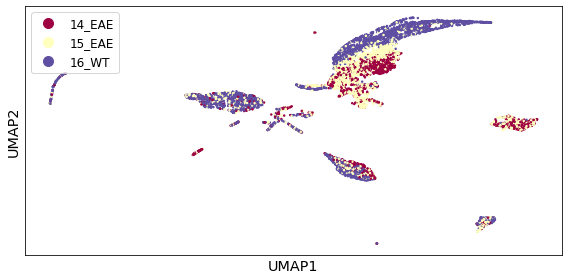

In [16]:
scprep.plot.scatter2d(data_umap, c=metadata['sample_labels'], figsize=(8,4), cmap="Spectral",
                      ticks=False, label_prefix="UMAP")

### Display PHATE for all samples

<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

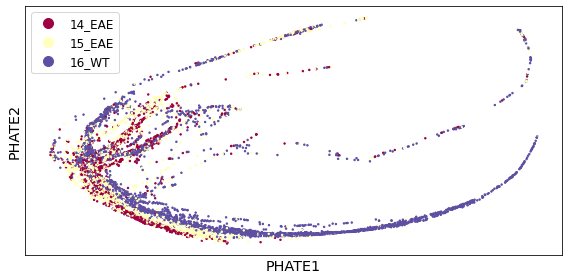

In [17]:
scprep.plot.scatter2d(data_phate, c=metadata['sample_labels'], figsize=(8,4), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

### Obtain clusters from UMAP data

In [18]:
kmeans_clusters = sklearn.cluster.KMeans(n_clusters=20).fit_predict(data_umap)

### Plot all clusters

<AxesSubplot:title={'center':'Clusters according to umap'}, xlabel='0', ylabel='1'>

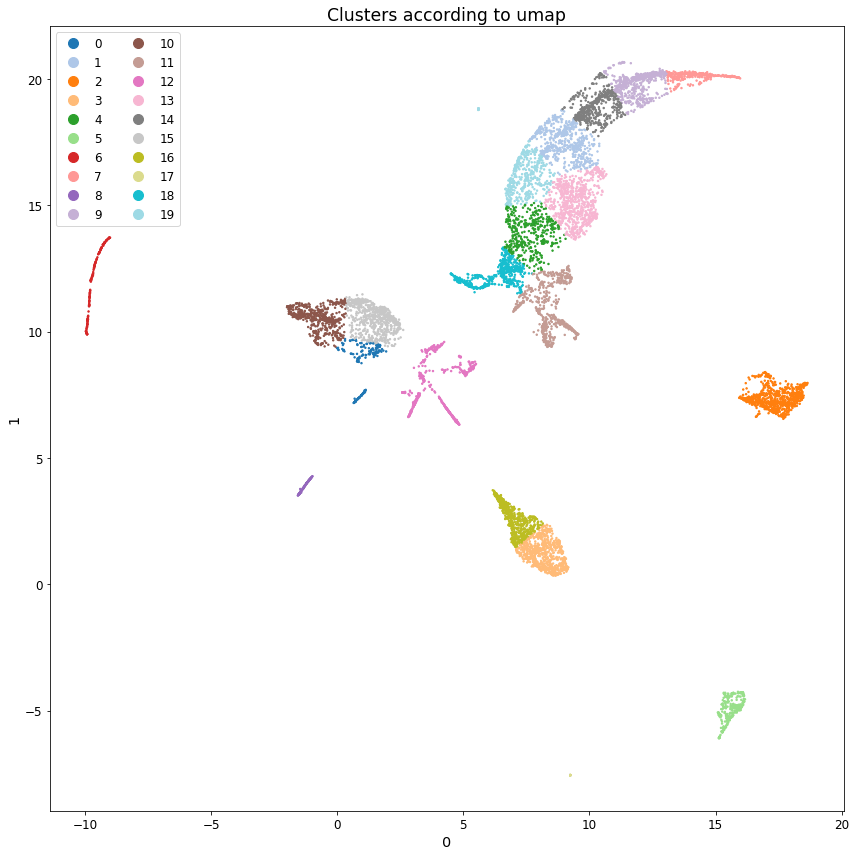

In [50]:
scprep.plot.scatter2d(data_umap, c=kmeans_clusters,figsize=(12, 12),  title="Clusters according to umap")

### Obtain gene markers

In [53]:
choroid_genes = get_cell_type_markers(gene_markers, "Choroid plexus cells")
ependymal_genes = get_cell_type_markers(gene_markers, "Ependymal cells")

### Plot genes on UMAP

In [ ]:
# genes_for_plotting = ependymal_genes

# n_cols = 2
# n_rows = round(len(genes_for_plotting)/2)

# fig, axes = plt.subplots(n_rows ,n_cols, figsize=(14,98))
# for curr_gene, ax in zip(genes_for_plotting, axes.flatten()):
    
#     # What cells contain an expression of this gene?
#     try:
#         expression = scprep.select.select_cols(data, exact_word=curr_gene)

#         sort_index = expression.sort_values().index

#         scprep.plot.scatter2d(data_umap.loc[sort_index], c=expression.loc[sort_index] > 0, shuffle=False,
#                              title=curr_gene, ticks=None, label_prefix='UMAP', ax=ax)
#     except:
#         print("Gene {} is not in samples".format(curr_gene))
# fig.tight_layout()
plot_gene_markers(data, data_umap, choroid_genes, "UMAP")
# np.set_printoptions(threshold=np.inf)
# data.columns.values

In [22]:
# Assign cluster number to each cell

kmeans_umap_clusters = pd.Series(kmeans_clusters, index=data.index, name = "kmeans_umap_clusters")
metadata = pd.concat([metadata, kmeans_umap_clusters], axis=1)

metadata

,sample_labels,library_size,kmeans_umap_clusters
AAACCTGGTATCGCAT-1_14_EAE,14_EAE,2460.0,16
AAACGGGAGAACTGTA-1_14_EAE,14_EAE,1154.0,16
AAACGGGGTTCTCATT-1_14_EAE,14_EAE,3949.0,13
AAACGGGGTTCTGAAC-1_14_EAE,14_EAE,4312.0,13
AAAGATGCAATGACCT-1_14_EAE,14_EAE,4120.0,2
...,...,...,...
TTTGTCACACGACGAA-1_16_WT,16_WT,4019.0,9
TTTGTCAGTGGCGAAT-1_16_WT,16_WT,2084.0,6
TTTGTCATCAGTTAGC-1_16_WT,16_WT,3603.0,1
TTTGTCATCATATCGG-1_16_WT,16_WT,2399.0,9


In [44]:
# Extracting appropriate subset

choroid_cell_cluster = 6
choroid_cell_cluster_names = metadata[metadata["kmeans_umap_clusters"] == choroid_cell_cluster].index
data_choroid = data.loc[choroid_cell_cluster_names]


In [47]:
# Obtain phate data
data_phate = phate.PHATE().fit_transform(data_choroid)
data_phate = pd.DataFrame(data_phate, index=data_choroid.index)

Calculating PHATE...
  Running PHATE on 190 observations and 17684 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 1.22 seconds.
  Calculating optimal t...
    Automatically selected t = 18
  Calculated optimal t in 0.03 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.03 seconds.
Calculated PHATE in 1.28 seconds.


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

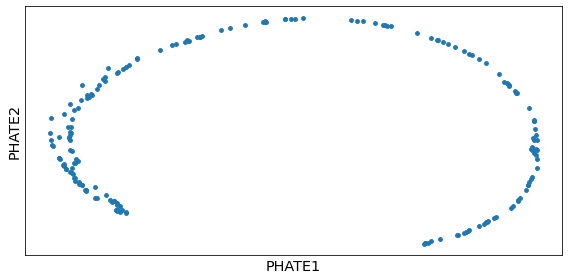

In [49]:
scprep.plot.scatter2d(data_phate, figsize=(8,4), cmap="Spectral",
                      ticks=False, label_prefix="PHATE")

## Differential expression